In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize
from scipy.ndimage import gaussian_filter
from scipy.ndimage import median_filter  # Median filter
import os

# New Section

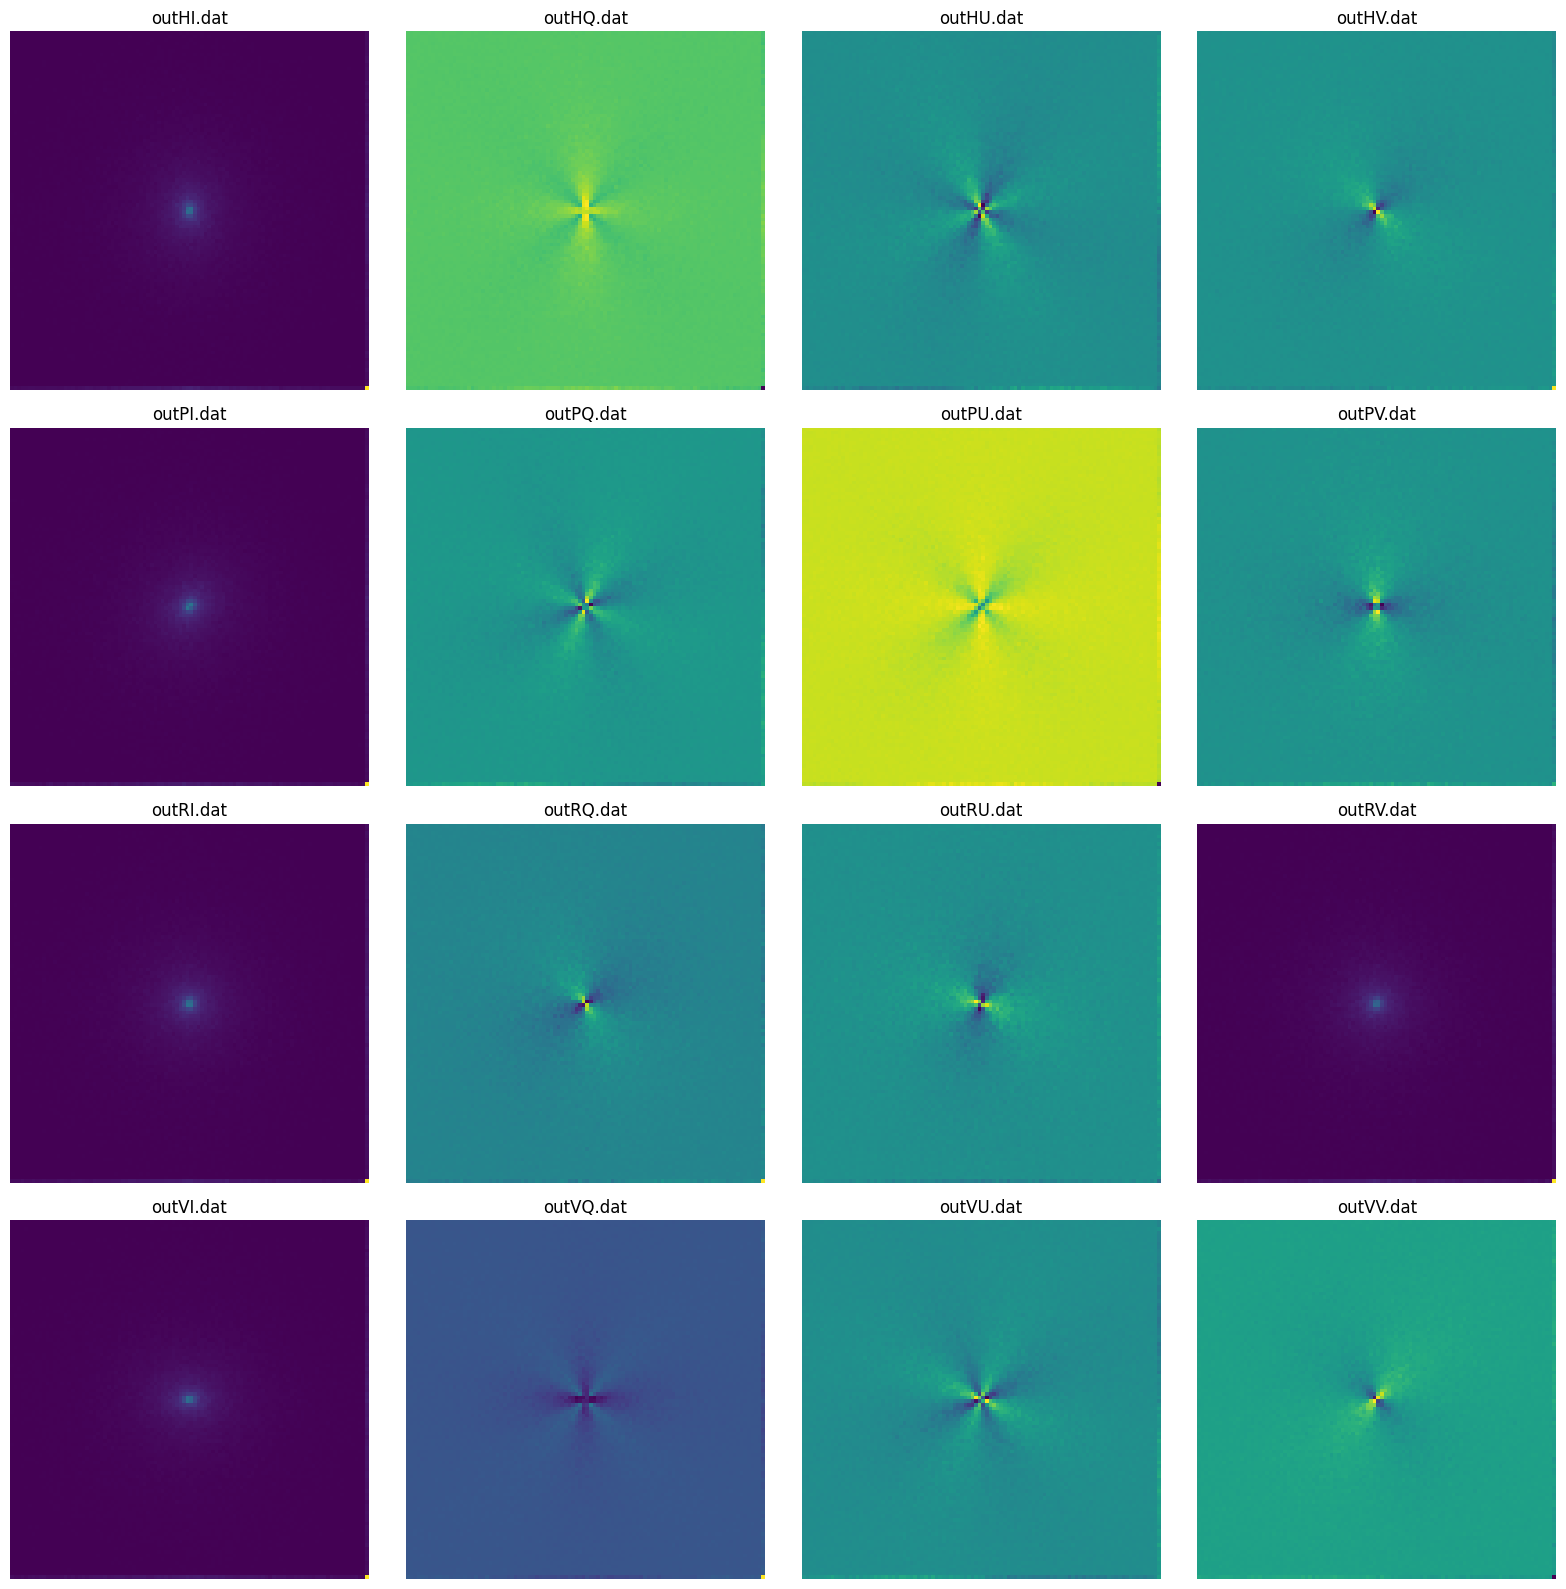

In [2]:
def plot_matrix_from_file(filename, subplot_index):
  try:
    matrix = np.loadtxt(filename)
  except Exception as e:
    print(f"Error loading matrix from file {filename}: {e}")
    return

  plt.subplot(*subplot_index)
  plt.imshow(matrix, cmap='viridis', interpolation='nearest')
  plt.title(filename)
  plt.axis('off')  # Turn off axis labels for better visualization

file_list = ['outHI.dat', 'outHQ.dat', 'outHU.dat', 'outHV.dat',
             'outPI.dat', 'outPQ.dat', 'outPU.dat', 'outPV.dat',
             'outRI.dat', 'outRQ.dat', 'outRU.dat', 'outRV.dat',
             'outVI.dat', 'outVQ.dat', 'outVU.dat', 'outVV.dat']

plt.figure(figsize=(16, 16))  # Adjust figure size as needed

for i, filename in enumerate(file_list):
  row = (i // 4) + 1
  col = (i % 4) + 1
  plot_matrix_from_file(filename, (4, 4, i + 1))

plt.tight_layout()
plt.show()


In [3]:
# File mapping
file_map = {
    'HI': 'outHI.dat',
    'VI': 'outVI.dat',
    'HQ': 'outHQ.dat',
    'VQ': 'outVQ.dat',
    'HU': 'outHU.dat',
    'VU': 'outVU.dat',
    'HV': 'outHV.dat',
    'VV': 'outVV.dat',
    'PI': 'outPI.dat',
    'RI': 'outRI.dat',
    'PQ': 'outPQ.dat',
    'RQ': 'outRQ.dat',
    'PU': 'outPU.dat',
    'RU': 'outRU.dat',
    'PV': 'outPV.dat',
    'RV': 'outRV.dat',
}


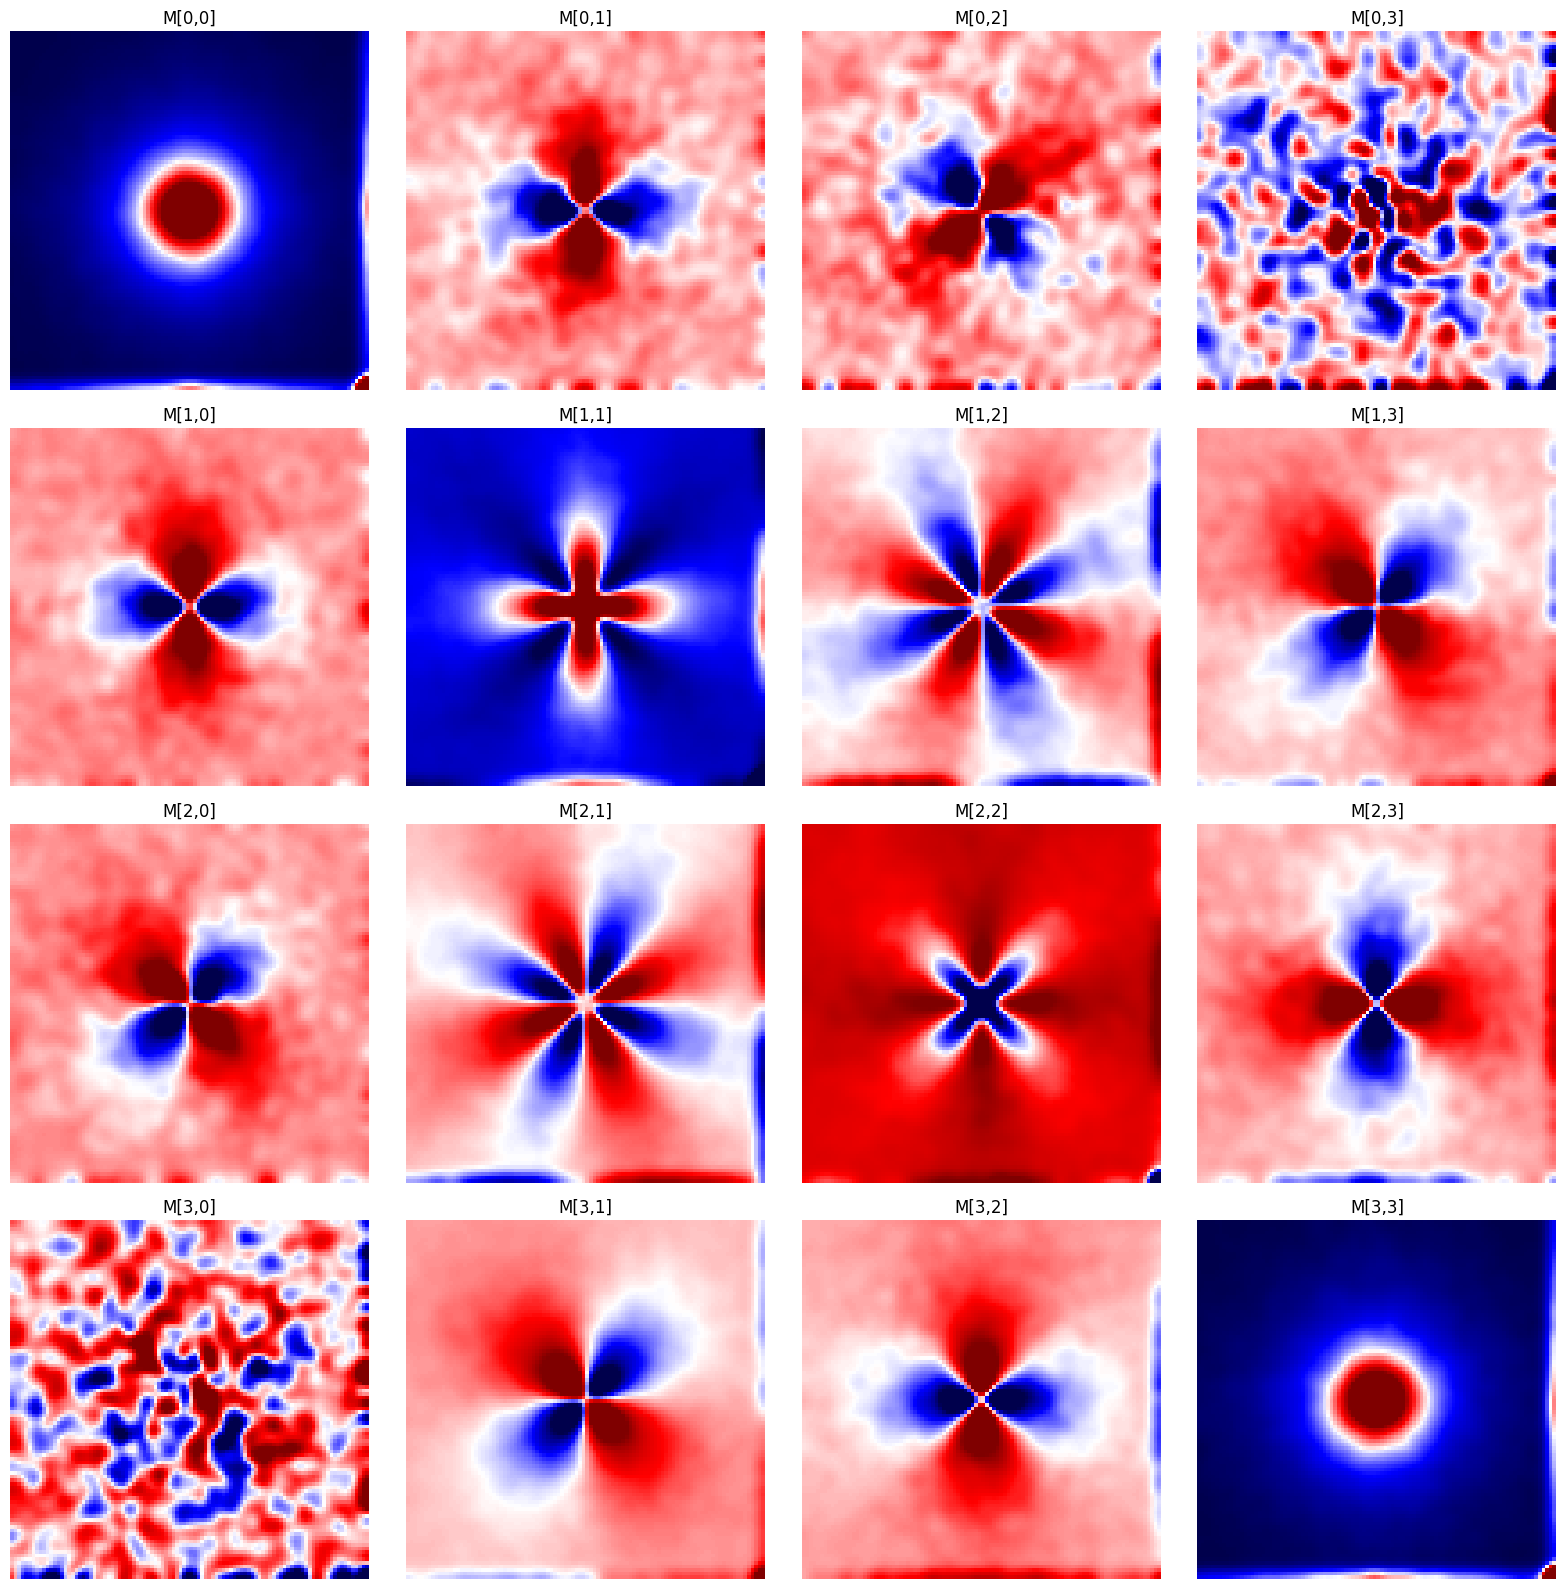

In [4]:
data = {}
for key, filename in file_map.items():
    if os.path.exists(filename):
        data[key] = np.loadtxt(filename)
    else:
        print(f"Warning: {filename} not found!")
        data[key] = None

# Check if all data is loaded
for key in data:
    if data[key] is None:
        raise FileNotFoundError(f"Missing file: {file_map[key]}")

# Build Mueller Matrix M
M = np.zeros((4, 4, *data['HI'].shape))

M[0, 0] = (data['HI'] + data['VI']) / 2
M[0, 1] = (data['HI'] - data['VI']) / 2
M[0, 2] = (2 * data['PI'] - (data['HI'] + data['VI'])) / 2
M[0, 3] = (2 * data['RI'] - (data['HI'] + data['VI'])) / 2

M[1, 0] = (data['HQ'] + data['VQ']) / 2
M[1, 1] = (data['HQ'] - data['VQ']) / 2
M[1, 2] = (2 * data['PQ'] - (data['HQ'] + data['VQ'])) / 2
M[1, 3] = (2 * data['RQ'] - (data['HQ'] + data['VQ'])) / 2

M[2, 0] = (data['HU'] + data['VU']) / 2
M[2, 1] = (data['HU'] - data['VU']) / 2
M[2, 2] = (2 * data['PU'] - (data['HU'] + data['VU'])) / 2
M[2, 3] = (2 * data['RU'] - (data['HU'] + data['VU'])) / 2

M[3, 0] = (data['HV'] + data['VV']) / 2
M[3, 1] = (data['HV'] - data['VV']) / 2
M[3, 2] = (2 * data['PV'] - (data['HV'] + data['VV'])) / 2
M[3, 3] = (2 * data['RV'] - (data['HV'] + data['VV'])) / 2

# --- Plotting all M[i,j] with filters and colors ---
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for i in range(4):
    for j in range(4):
        # Apply Gaussian filter
        smoothed = gaussian_filter(M[i, j], sigma=2)

        # Normalize
        norm = Normalize(vmin=np.percentile(smoothed, 1),
                         vmax=np.percentile(smoothed, 98))

        # Plot
        axes[i, j].imshow(smoothed, cmap='seismic', norm=norm)
        axes[i, j].set_title(f'M[{i},{j}]')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

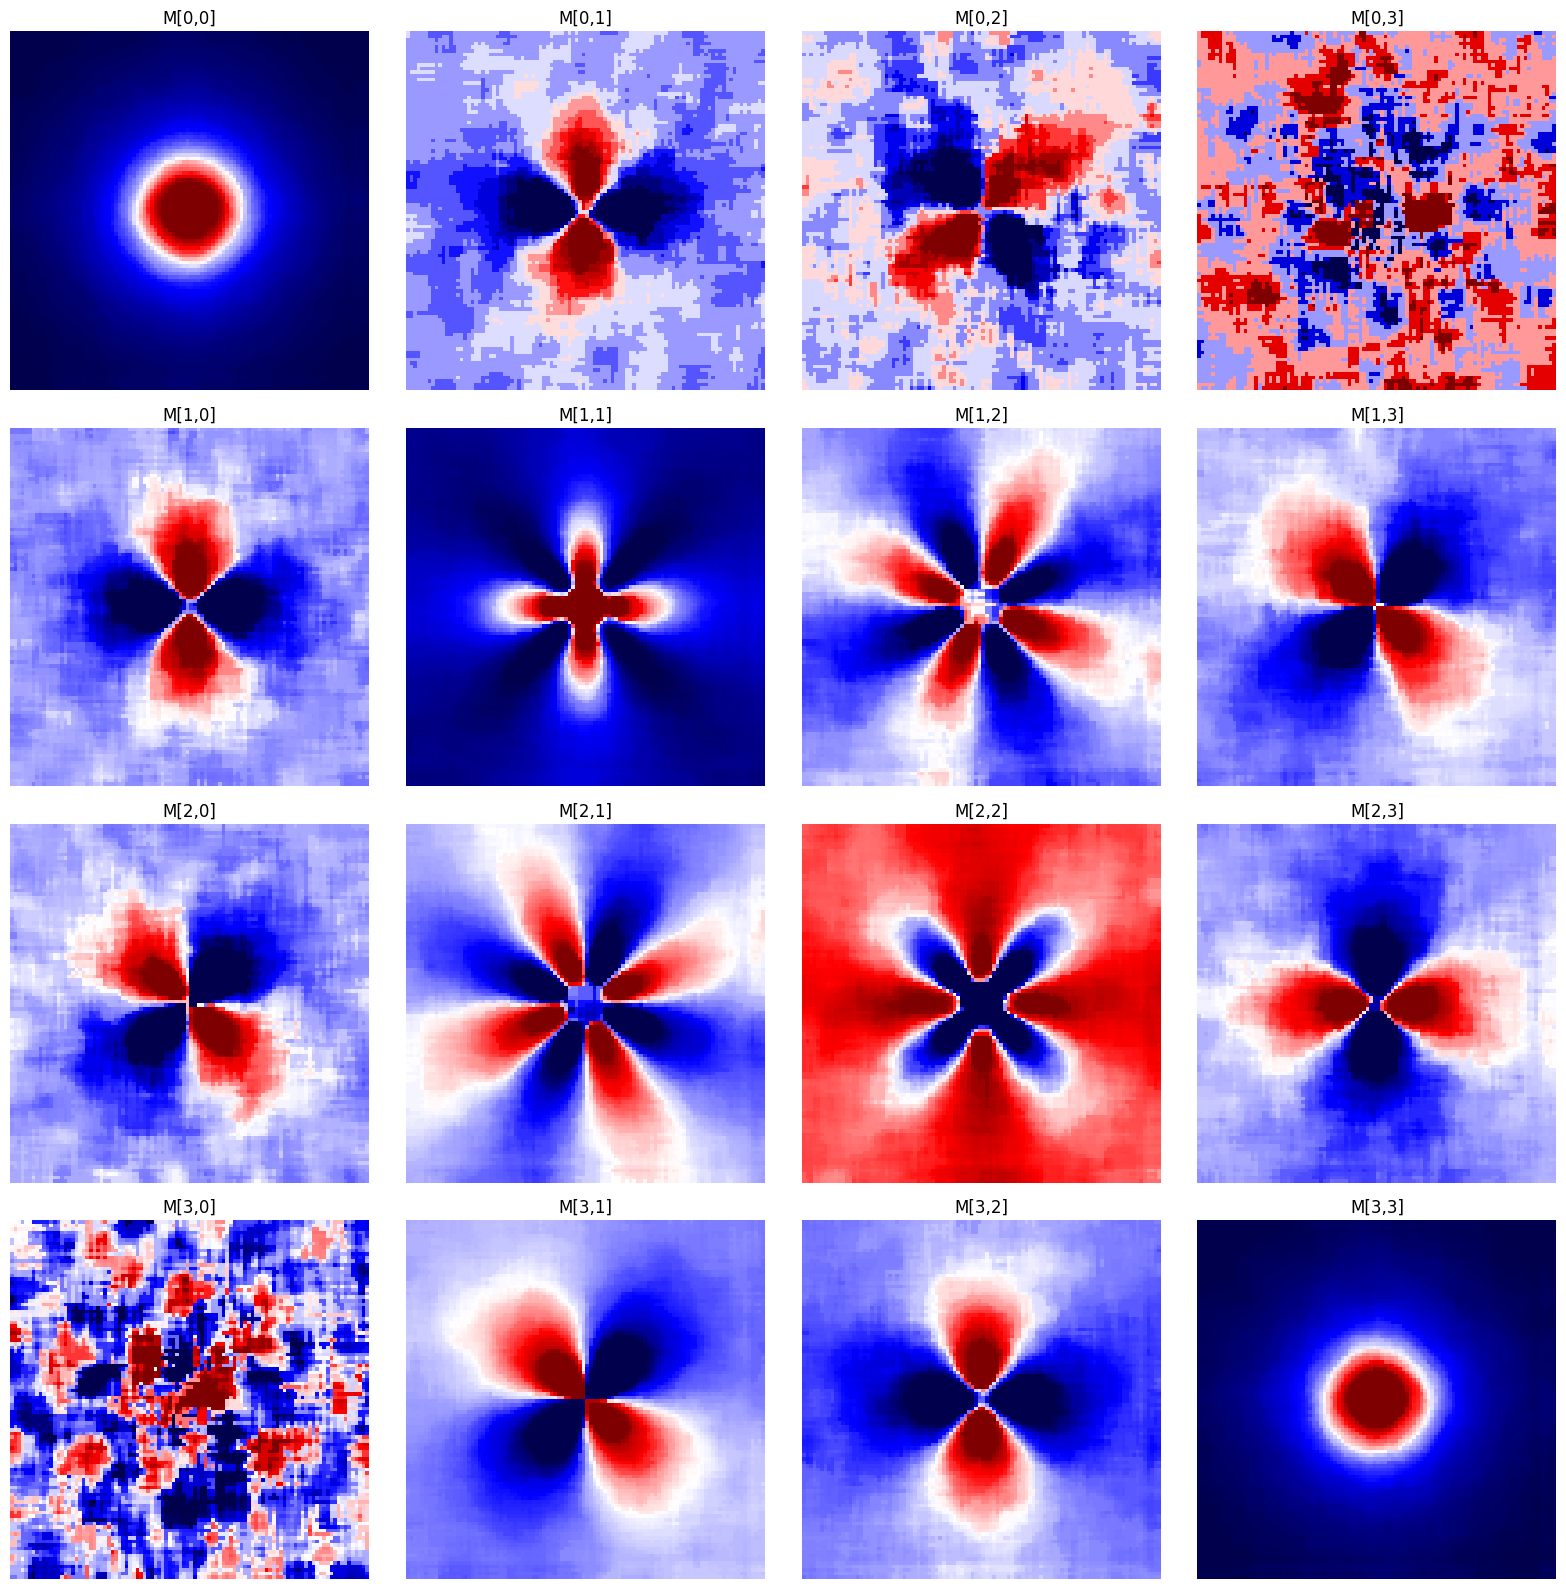

In [5]:
data = {}
for key, filename in file_map.items():
    if os.path.exists(filename):
        data[key] = np.loadtxt(filename)
    else:
        print(f"Warning: {filename} not found!")
        data[key] = None

# Check if all data is loaded
for key in data:
    if data[key] is None:
        raise FileNotFoundError(f"Missing file: {file_map[key]}")

# Build Mueller Matrix M
M = np.zeros((4, 4, *data['HI'].shape))

M[0, 0] = (data['HI'] + data['VI']) / 2
M[0, 1] = (data['HI'] - data['VI']) / 2
M[0, 2] = (2 * data['PI'] - (data['HI'] + data['VI'])) / 2
M[0, 3] = (2 * data['RI'] - (data['HI'] + data['VI'])) / 2

M[1, 0] = (data['HQ'] + data['VQ']) / 2
M[1, 1] = (data['HQ'] - data['VQ']) / 2
M[1, 2] = (2 * data['PQ'] - (data['HQ'] + data['VQ'])) / 2
M[1, 3] = (2 * data['RQ'] - (data['HQ'] + data['VQ'])) / 2

M[2, 0] = (data['HU'] + data['VU']) / 2
M[2, 1] = (data['HU'] - data['VU']) / 2
M[2, 2] = (2 * data['PU'] - (data['HU'] + data['VU'])) / 2
M[2, 3] = (2 * data['RU'] - (data['HU'] + data['VU'])) / 2

M[3, 0] = (data['HV'] + data['VV']) / 2
M[3, 1] = (data['HV'] - data['VV']) / 2
M[3, 2] = (2 * data['PV'] - (data['HV'] + data['VV'])) / 2
M[3, 3] = (2 * data['RV'] - (data['HV'] + data['VV'])) / 2

# --- Plotting all M[i,j] with Median filter ---
fig, axes = plt.subplots(4, 4, figsize=(16, 16))  # Make subplot grid

for i in range(4):
    for j in range(4):
        # Apply Median Filter
        filtered = median_filter(M[i, j], size=9)  # size=3 kernel, can adjust

        # Normalize
        norm = Normalize(vmin=np.percentile(filtered,4),
                         vmax=np.percentile(filtered, 98))

        # Plot
        axes[i, j].imshow(filtered, cmap='seismic', norm=norm)
        axes[i, j].set_title(f'M[{i},{j}]')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()
